In [1]:
import os
import yaml
import json

from turtle import color
import numpy as np
import os
import seaborn as sns
import pandas as pd
import datetime


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend import Legend
from matplotlib.ticker import MultipleLocator
from matplotlib import colors

from IPython.display import Image

In [93]:
WB_DATA_DIR='/mnt/ps/home/CORP/yassir.elmesbahi/sandbox/.wandb/wandb'
OUTPUT_DIR='/mnt/ps/home/CORP/yassir.elmesbahi/sandbox/unimodality_pipeline'

# Garder une consistance pour les couleurs
dynamics_cmap = {
    'train_loss':'tab:red',
    'alignment_loss':'tab:red',
    
    'val_loss':'tab:orange',
    'val_alignment_loss':'tab:orange',
    
    'knn_top1':'tab:blue',
    'knn_top5':'tab:blue',
    
    'original_knn_top1':'tab:green',
    'original_knn_top5':'tab:green',
    
    'treqsek_split.h5ad_CORUM':'tab:brown',
    'treqsek_split.h5ad_HuMAP':'tab:pink',
    'treqsek_split.h5ad_Reactome':'tab:cyan',
    'treqsek_split.h5ad_SIGNOR':'tab:grey',
    'treqsek_split.h5ad_StringDB':'tab:purple',
    
    'treqsek_split.h5ad_StringDB':'tab:red',
    'treqsek_split.h5ad_TxDB':'tab:green',
    'treqsek_split.h5ad_PhDB':'tab:orange',
    'treqsek_split_avg':'tab:blue',
    
    
    'crispr_l1000.h5ad_CORUM':'tab:red',
    'crispr_l1000.h5ad_HuMAP':'tab:orange',
    'crispr_l1000.h5ad_Reactome':'tab:blue',
    'crispr_l1000.h5ad_SIGNOR':'tab:green',
    
    'crispr_l1000.h5ad_StringDB':'tab:brown',
    'crispr_l1000.h5ad_TxDB':'tab:pink',
    
    'crispr_l1000.h5ad_PhDB':'tab:cyan',
    'crispr_l1000_avg':'tab:blue',
}

# Garder une consistance pour les couleurs
dynamics_cmap = {
    'train_loss':'tab:red',
    'alignment_loss':'tab:red',
    
    'val_loss':'tab:orange',
    'val_alignment_loss':'tab:orange',
    
    'knn_top1':'tab:blue',
    'knn_top5':'tab:blue',
    
    'original_knn_top1':'tab:green',
    'original_knn_top5':'tab:green',
    
    'treqsek_split.h5ad_CORUM':'tab:brown',
    'treqsek_split.h5ad_HuMAP':'tab:pink',
    'treqsek_split.h5ad_Reactome':'tab:cyan',
    'treqsek_split.h5ad_SIGNOR':'tab:grey',
    'treqsek_split.h5ad_StringDB':'tab:purple',
    
    'treqsek_split.h5ad_StringDB':'tab:red',
    'treqsek_split.h5ad_TxDB':'tab:green',
    'treqsek_split.h5ad_PhDB':'tab:orange',
    'treqsek_split_avg':'tab:blue',
    'treqsek_avg':'tab:blue',
    
    
    'crispr_l1000.h5ad_CORUM':'tab:red',
    'crispr_l1000.h5ad_HuMAP':'tab:orange',
    'crispr_l1000.h5ad_Reactome':'tab:blue',
    'crispr_l1000.h5ad_SIGNOR':'tab:green',
    
    'crispr_l1000.h5ad_StringDB':'tab:brown',
    'crispr_l1000.h5ad_TxDB':'tab:pink',
    
    'crispr_l1000.h5ad_PhDB':'tab:cyan',
    'crispr_l1000_avg':'tab:red',
    'l1000_avg':'tab:red',
}

KEYS={
    "train_loss", 
    "val_loss", 
    "knn_top1", 
    "knn_top5", 
    "original_knn_top1", 
    "original_knn_top5", 
    "treqsek_split.h5ad_CORUM", 
    "treqsek_split.h5ad_HuMAP", 
    "treqsek_split.h5ad_Reactome", 
    "treqsek_split.h5ad_SIGNOR", 
    "treqsek_split.h5ad_StringDB", 
    "treqsek_split.h5ad_TxDB", 
    "treqsek_split.h5ad_PhDB", 
    "treqsek_split_avg", 
    "crispr_l1000.h5ad_CORUM", 
    "crispr_l1000.h5ad_HuMAP", 
    "crispr_l1000.h5ad_Reactome", 
    "crispr_l1000.h5ad_SIGNOR", 
    "crispr_l1000.h5ad_StringDB", 
    "crispr_l1000.h5ad_TxDB", 
    "crispr_l1000.h5ad_PhDB", 
    "crispr_l1000_avg",
}


METHODS={
    'clip', 
    'sigclip',
    'c2kd', 
    'vicreg'
}

In [94]:
def set_plot_env():
    mpl.rcdefaults()
    mpl.rcParams['mathtext.default']= 'regular'
    mpl.rcParams['font.size'] = 18.
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.weight'] = "normal"
    mpl.rcParams['axes.labelsize'] = 18.
    mpl.rcParams['xtick.labelsize'] = 18
    mpl.rcParams['ytick.labelsize'] = 18
    
    mpl.rcParams['xtick.major.width'] = 0.6
    mpl.rcParams['ytick.major.width'] = 0.6
    mpl.rcParams['axes.linewidth'] = 0.6
    mpl.rcParams['pdf.fonttype'] = 3
    
    mpl.rcParams["xtick.minor.visible"] = "off"
    mpl.rcParams["xtick.direction"] = "in"
    mpl.rcParams["xtick.top"] = "off"
    mpl.rcParams["xtick.major.size"] = 8
    mpl.rcParams["xtick.minor.size"] = 5
    
    mpl.rcParams["ytick.minor.visible"] = "off"
    mpl.rcParams["ytick.direction"] = "in"
    mpl.rcParams["ytick.major.size"] = 8
    mpl.rcParams["ytick.minor.size"] = 5
    mpl.rcParams["ytick.right"] = "off"

def prepare_dataframe(wandb_dir=WB_DATA_DIR, output_dir=OUTPUT_DIR):
    DF_DIC = {
        "method": [], 
        "seed": [], 
        "ph_disabled": [], 
        "ph_encoder_lr": [], 
        "ph_classifier_lr": [], 
        "train_loss": [], 
        "val_loss": [], 
        "knn_top1": [], 
        "knn_top5": [], 
        "original_knn_top1": [], 
        "original_knn_top5": [], 
        "treqsek_split.h5ad_CORUM": [], 
        "treqsek_split.h5ad_HuMAP": [], 
        "treqsek_split.h5ad_Reactome": [], 
        "treqsek_split.h5ad_SIGNOR": [], 
        "treqsek_split.h5ad_StringDB": [], 
        "treqsek_split.h5ad_TxDB": [], 
        "treqsek_split.h5ad_PhDB": [], 
        "treqsek_split_avg": [], 
        "crispr_l1000.h5ad_CORUM": [], 
        "crispr_l1000.h5ad_HuMAP": [], 
        "crispr_l1000.h5ad_Reactome": [], 
        "crispr_l1000.h5ad_SIGNOR": [], 
        "crispr_l1000.h5ad_StringDB": [], 
        "crispr_l1000.h5ad_TxDB": [], 
        "crispr_l1000.h5ad_PhDB": [], 
        "crispr_l1000_avg": []
        }
    FAILED_FILES = {}
    for item in os.listdir(wandb_dir):
        # check if current path is a file
        path = os.path.join(wandb_dir, item)
        if not os.path.isdir(path):
            FAILED_FILES[f'{path}'] = {'Cause': 'Non existing directory.'}
            continue
        path = os.path.join(path, 'files')
        if not os.path.isdir(path):
            FAILED_FILES[f'{path}'] = {'Cause': 'Non existing directory.'}
            continue
        print(f"Processing folder '{os.path.join(item, 'files')}'")
        summary, config = {}, {}
        if not os.path.isfile(os.path.join(path, 'wandb-summary.json')):
            FAILED_FILES[f"{os.path.join(path, 'wandb-summary.json')}"] = {'Cause': 'Non existing summary.'}
            continue
        if not os.path.isfile(os.path.join(path, 'config.yaml')):
            FAILED_FILES[f"{os.path.join(path, 'config.yaml')}"] = {'Cause': 'Non existing yaml.'}
            continue
        with open(os.path.join(path, 'wandb-summary.json')) as f:
            summary = json.load(f)
        
        with open(os.path.join(path, 'config.yaml')) as stream:
            try:
                config = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                FAILED_FILES[f"{os.path.join(path, 'config.yaml')}"] = {'Cause': f'Exception {exc}.'}
                continue
        try:
            method = config['method']['value']
            seed = config['seed']['value']
            ph_encoder_lr = config['ph_encoder_lr']['value']
            ph_classifier_lr = config['ph_classifier_lr']['value']
            ph_disabled = config['ph_disabled']['value']
        except KeyError as exc:
            FAILED_FILES[f"{path}"] = {'Cause': f'Exception {exc}.'}
            continue
        if not KEYS.issubset(set(summary.keys())):
            FAILED_FILES[f"{path}"] = {'Cause': f'Missing eval keys.'}
            continue
        if method not in METHODS:
            continue
        DF_DIC['method'].append(method)
        DF_DIC['seed'].append(seed)
        DF_DIC['ph_disabled'].append(ph_disabled)
        if config['ph_disabled']['value'] == False:
            DF_DIC['ph_encoder_lr'].append(ph_encoder_lr)
        else:
            DF_DIC['ph_encoder_lr'].append(0.0)
        DF_DIC['ph_classifier_lr'].append(ph_classifier_lr)
        DF_DIC['train_loss'].append(summary['train_loss'])
        DF_DIC['val_loss'].append(summary['val_loss'])
        DF_DIC['knn_top1'].append(summary['knn_top1'])
        DF_DIC['knn_top5'].append(summary['knn_top5'])
        DF_DIC['original_knn_top1'].append(summary['original_knn_top1'])
        DF_DIC['original_knn_top5'].append(summary['original_knn_top5'])
        
        DF_DIC['treqsek_split.h5ad_CORUM'].append(summary['treqsek_split.h5ad_CORUM'])
        DF_DIC['treqsek_split.h5ad_HuMAP'].append(summary['treqsek_split.h5ad_HuMAP'])
        DF_DIC['treqsek_split.h5ad_Reactome'].append(summary['treqsek_split.h5ad_Reactome'])
        DF_DIC['treqsek_split.h5ad_SIGNOR'].append(summary['treqsek_split.h5ad_SIGNOR'])
        DF_DIC['treqsek_split.h5ad_StringDB'].append(summary['treqsek_split.h5ad_StringDB'])
        DF_DIC['treqsek_split.h5ad_TxDB'].append(summary['treqsek_split.h5ad_TxDB'])
        DF_DIC['treqsek_split.h5ad_PhDB'].append(summary['treqsek_split.h5ad_PhDB'])
        DF_DIC['treqsek_split_avg'].append(summary['treqsek_split_avg'])
        
        DF_DIC['crispr_l1000.h5ad_CORUM'].append(summary['crispr_l1000.h5ad_CORUM'])
        DF_DIC['crispr_l1000.h5ad_HuMAP'].append(summary['crispr_l1000.h5ad_HuMAP'])
        DF_DIC['crispr_l1000.h5ad_Reactome'].append(summary['crispr_l1000.h5ad_Reactome'])
        DF_DIC['crispr_l1000.h5ad_SIGNOR'].append(summary['crispr_l1000.h5ad_SIGNOR'])
        DF_DIC['crispr_l1000.h5ad_StringDB'].append(summary['crispr_l1000.h5ad_StringDB'])
        DF_DIC['crispr_l1000.h5ad_TxDB'].append(summary['crispr_l1000.h5ad_TxDB'])
        DF_DIC['crispr_l1000.h5ad_PhDB'].append(summary['crispr_l1000.h5ad_PhDB'])
        DF_DIC['crispr_l1000_avg'].append(summary['crispr_l1000_avg'])
    
    df = pd.DataFrame.from_dict(DF_DIC)
    df.replace(to_replace=[None, 'None','NaN'], value=np.nan, inplace=True)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # Creating averages columns
    df['treqsek_avg'] = df[['treqsek_split.h5ad_CORUM',  'treqsek_split.h5ad_HuMAP',  'treqsek_split.h5ad_Reactome', 'treqsek_split.h5ad_SIGNOR']].mean(axis=1)
    df['l1000_avg'] = df[['crispr_l1000.h5ad_CORUM', 'crispr_l1000.h5ad_HuMAP', 'crispr_l1000.h5ad_Reactome', 'crispr_l1000.h5ad_SIGNOR', ]].mean(axis=1)
    
    grouped_df = df.groupby(by=["method", "ph_encoder_lr"])[['treqsek_avg','l1000_avg']].mean().reset_index()
    os.makedirs(output_dir, exist_ok=True)
    df.to_csv(os.path.join(output_dir, 'results.csv'))
    grouped_df.to_csv(os.path.join(output_dir, 'grouped_results.csv'))
    return df, grouped_df, FAILED_FILES



In [95]:
df, grouped_df, failed = prepare_dataframe(wandb_dir=WB_DATA_DIR, output_dir=OUTPUT_DIR)

Processing folder 'run-20241101_145712-vfslxxah/files'
Processing folder 'run-20241103_120317-ict28vkx/files'
Processing folder 'run-20241004_182745-q35kx3tg/files'
Processing folder 'run-20241031_220221-o1w6x0uf/files'
Processing folder 'run-20241031_130543-tv1t2k2o/files'
Processing folder 'run-20241103_163939-8sm7gr32/files'
Processing folder 'run-20241101_124210-2ydambak/files'
Processing folder 'run-20241031_220859-g5cc9va7/files'
Processing folder 'run-20241101_084305-9a6738n5/files'
Processing folder 'run-20241101_085245-ltj0un8h/files'
Processing folder 'run-20241101_130722-dalosp7h/files'
Processing folder 'run-20241031_132014-ookeihpp/files'
Processing folder 'run-20241031_221929-f80o6ar6/files'
Processing folder 'run-20241031_131301-z2qspjyx/files'
Processing folder 'run-20241004_174713-v8u1nxar/files'
Processing folder 'run-20241101_133306-0d6yven7/files'
Processing folder 'run-20241101_084637-q7lp3sfj/files'
Processing folder 'run-20241101_100242-0c4cz6c4/files'
Processing

Processing folder 'run-20241101_085131-evu0nres/files'
Processing folder 'run-20241031_215254-gqwpz2b6/files'
Processing folder 'run-20241101_084306-ixg2gg1d/files'
Processing folder 'run-20241101_132934-geh55120/files'
Processing folder 'run-20241103_163939-w84xo8ts/files'
Processing folder 'run-20241101_145405-d54sc9vj/files'
Processing folder 'run-20241031_224032-3hbpvne6/files'
Processing folder 'run-20241101_135125-5zz0dth3/files'
Processing folder 'run-20241103_120309-jf4kidub/files'
Processing folder 'run-20241101_085237-7bwhdcrw/files'
Processing folder 'run-20241103_164541-4pkjxhmw/files'
Processing folder 'run-20241031_131009-9z7r7ilc/files'
Processing folder 'run-20241101_110736-vj70iur2/files'
Processing folder 'run-20241031_130542-ar6ebewd/files'
Processing folder 'run-20241101_085237-a8keqj8u/files'
Processing folder 'run-20241031_130542-tmf94ru8/files'
Processing folder 'run-20241031_223117-ib1liair/files'
Processing folder 'run-20241031_140546-oz25lyse/files'
Processing

In [96]:
METRICS = [
    'treqsek_avg', 
    'l1000_avg'
    ]

def plot_single_fig(df, method, y_lbl, x_lbl, output_dir='./'):
    _, axis = plt.subplots(ncols=1, nrows=1, figsize=(10, 8), facecolor="#ffffff")
    
    # Graphes
    sns.lineplot(y=f'{y_lbl}', x=f'{x_lbl}', data=df, color=dynamics_cmap[f'{y_lbl}'],
                 ax=axis, label=f'{y_lbl}').set(xlabel=f'{x_lbl}', ylabel=None)
    
    plt.xticks(df[f'{x_lbl}'], labels = df[f'{x_lbl}'])
    axis.set_xscale('log')
    
    os.makedirs(output_dir, exist_ok = True)
    plt.savefig(os.path.join(output_dir, f'{method}_{y_lbl}.png'), pad_inches=0, bbox_inches='tight', transparent=True)
    plt.close()

#Image(filename='test.png') 

def plot_all(df, metrics, output_dir):
    os.makedirs(output_dir, exist_ok = True)
    methods = df.method.unique()
    for method in methods:
        subdf = df.loc[df['method']==method]
        print(subdf.columns)
        for metric in metrics:
            plot_single_fig(subdf, method, metric, 'ph_encoder_lr' if method != 'shake' else 'ph_classifier_lr', output_dir=output_dir)

In [97]:
plot_all(df, METRICS, os.path.join(OUTPUT_DIR,'figures'))

Index(['method', 'seed', 'ph_disabled', 'ph_encoder_lr', 'ph_classifier_lr',
       'train_loss', 'val_loss', 'knn_top1', 'knn_top5', 'original_knn_top1',
       'original_knn_top5', 'treqsek_split.h5ad_CORUM',
       'treqsek_split.h5ad_HuMAP', 'treqsek_split.h5ad_Reactome',
       'treqsek_split.h5ad_SIGNOR', 'treqsek_split.h5ad_StringDB',
       'treqsek_split.h5ad_TxDB', 'treqsek_split.h5ad_PhDB',
       'treqsek_split_avg', 'crispr_l1000.h5ad_CORUM',
       'crispr_l1000.h5ad_HuMAP', 'crispr_l1000.h5ad_Reactome',
       'crispr_l1000.h5ad_SIGNOR', 'crispr_l1000.h5ad_StringDB',
       'crispr_l1000.h5ad_TxDB', 'crispr_l1000.h5ad_PhDB', 'crispr_l1000_avg',
       'treqsek_avg', 'l1000_avg'],
      dtype='object')
Index(['method', 'seed', 'ph_disabled', 'ph_encoder_lr', 'ph_classifier_lr',
       'train_loss', 'val_loss', 'knn_top1', 'knn_top5', 'original_knn_top1',
       'original_knn_top5', 'treqsek_split.h5ad_CORUM',
       'treqsek_split.h5ad_HuMAP', 'treqsek_split.h5ad_Reactome

In [98]:
os.path.join(OUTPUT_DIR,'figures')

'/mnt/ps/home/CORP/yassir.elmesbahi/sandbox/unimodality_pipeline/figures'

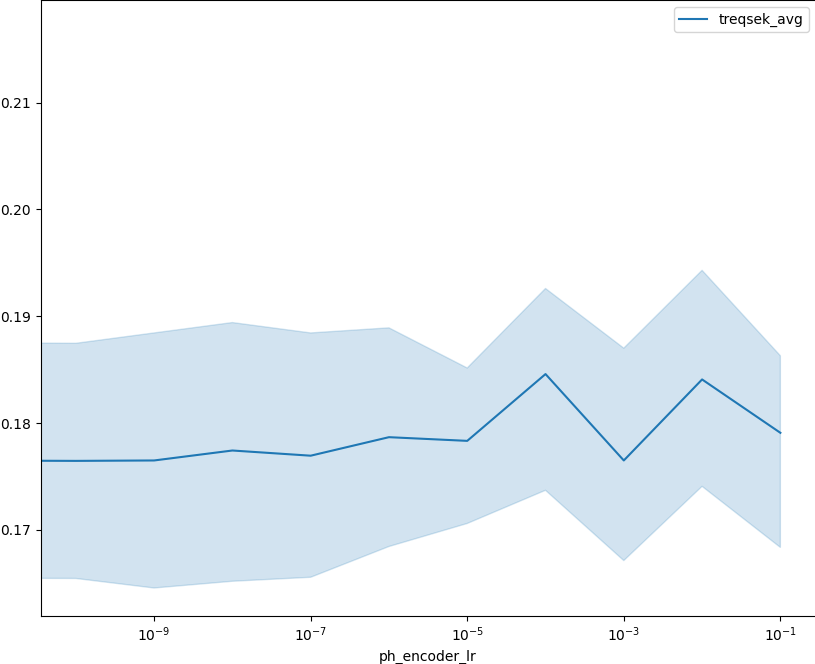

In [102]:
Image(os.path.join(os.path.join(OUTPUT_DIR,'figures'),'clip_treqsek_avg.png'))